In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

In [ ]:
end = datetime.now()
start = datetime(end.year - 20, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [ ]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-03-16,82579.687500,85051.601562,82017.906250,84333.320312,21330270174
2025-03-17,84075.687500,84725.328125,82492.156250,82576.335938,25092785558
2025-03-18,82718.500000,84075.718750,81179.992188,84075.718750,24095774594
2025-03-19,86854.226562,87021.187500,82569.726562,82718.804688,34931960257
2025-03-20,83986.390625,87427.312500,83709.460938,86870.867188,35691270144


In [ ]:
stock_data.describe().T #count

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3838.0,2.112911e+04,2.436997e+04,1.781030e+02,1.501985e+03,9.602799e+03,3.421556e+04,1.061463e+05
High,BTC-USD,3838.0,2.157819e+04,2.487232e+04,2.117310e+02,1.514278e+03,9.762642e+03,3.502640e+04,1.091149e+05
Low,BTC-USD,3838.0,2.061242e+04,2.379788e+04,1.715100e+02,1.458297e+03,9.395795e+03,3.292609e+04,1.052917e+05
Open,BTC-USD,3838.0,2.110853e+04,2.435264e+04,1.768970e+02,1.463015e+03,9.600234e+03,3.420838e+04,1.061473e+05
Volume,BTC-USD,3838.0,1.917236e+10,2.081318e+10,5.914570e+06,5.931725e+08,1.530635e+10,3.044445e+10,3.509679e+11


In [ ]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3838 entries, 2014-09-17 to 2025-03-20
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3838 non-null   float64
 1   (High, BTC-USD)    3838 non-null   float64
 2   (Low, BTC-USD)     3838 non-null   float64
 3   (Open, BTC-USD)    3838 non-null   float64
 4   (Volume, BTC-USD)  3838 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 179.9 KB


In [ ]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [ ]:
#close stock price
closing_price = stock_data[['Close']]

In [ ]:
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-03-16,82579.687500
2025-03-17,84075.687500


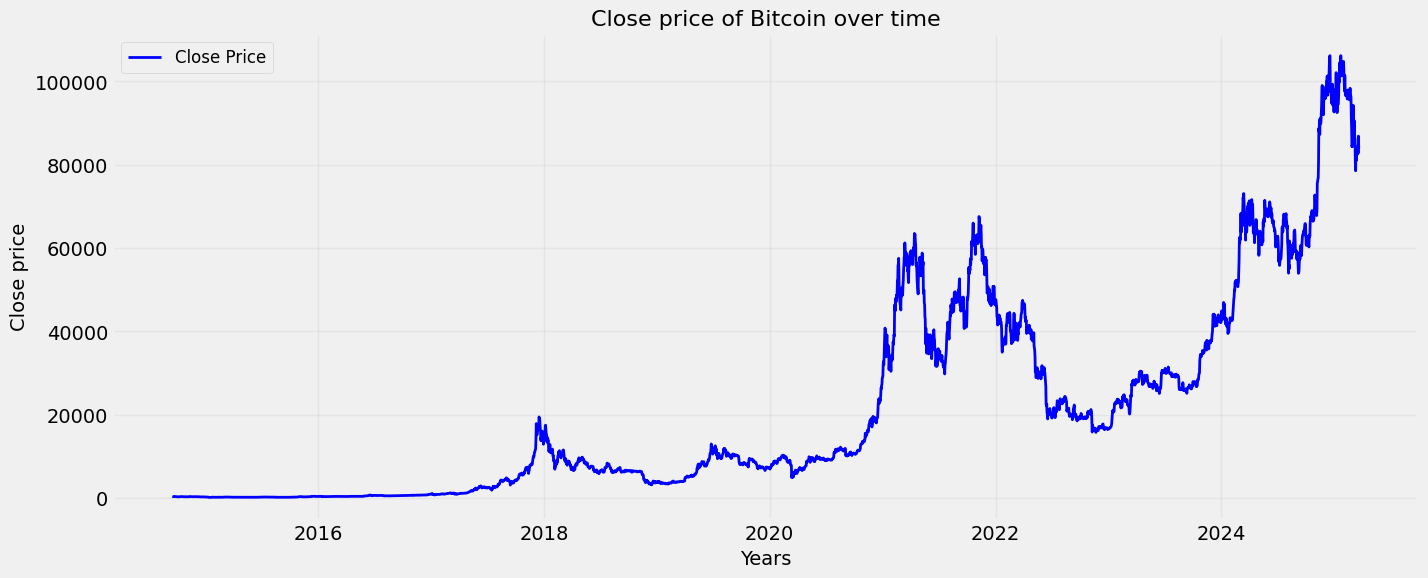

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(closing_price.index, closing_price['Close'], label='Close Price', color="blue", linewidth=2)
plt.title("Close price of Bitcoin over time", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Close price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


In [ ]:
#Understand Moving Average

In [ ]:
for i in range(2014,2024):
  print(i,list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [ ]:
closing_price["MA_365"] = closing_price["Close"].rolling(window=365).mean()
closing_price["MA_100"] = closing_price["Close"].rolling(window=100).mean()


<ipython-input-69-2c9872f4c018>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price["MA_365"] = closing_price["Close"].rolling(window=365).mean()
<ipython-input-69-2c9872f4c018>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price["MA_100"] = closing_price["Close"].rolling(window=100).mean()


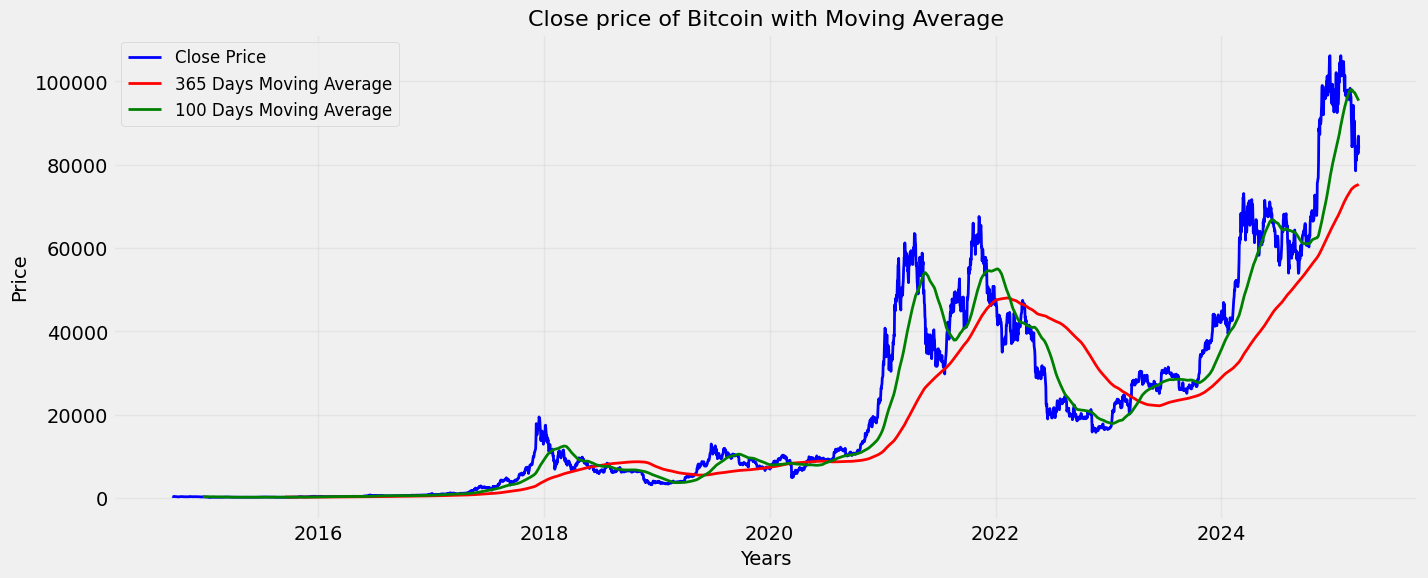

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(closing_price.index, closing_price['Close'], label='Close Price', color="blue", linewidth=2)
plt.plot(closing_price.index, closing_price['MA_365'], label='365 Days Moving Average', color="red", linewidth=2)
plt.plot(closing_price.index, closing_price['MA_100'], label='100 Days Moving Average', color="green", linewidth=2)

plt.title("Close price of Bitcoin with Moving Average", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


In [ ]:
#LSTM - long short term memory
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [ ]:
scaled_data

array([[0.00263505],
       [0.00232463],
       [0.00204489],
       ...,
       [0.77891694],
       [0.81794495],
       [0.79088177]])

In [ ]:
len(scaled_data)

3838

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
#Prepare data for LSTM
x_data= []
y_data =[]
base_days=100
for i in range(base_days , len(scaled_data)):
  x_data.append(scaled_data[i-base_days:i])
  y_data.append(scaled_data[i])
x_data =np.array(x_data)
y_data =np.array(y_data)

In [ ]:
# Split the dataset into Train and Test
train_size = int(len(x_data)*0.9)
x_train , y_train = x_data[:train_size] , y_data[:train_size]
x_test , y_test = x_data[train_size:] , y_data[train_size:]

In [ ]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),  # Added comma
    LSTM(128, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           3,225 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,395 (786.70 KB)

 Trainable params: 201,395 (786.70 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Defining the Number of epochs
model.fit(x_train, y_train , batch_size=1, epochs=10)

Epoch 1/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 406s 119ms/step - loss: 8.7900e-04
Epoch 2/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 382s 114ms/step - loss: 3.4148e-04
Epoch 3/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 443s 114ms/step - loss: 2.4438e-04
Epoch 4/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 437s 112ms/step - loss: 2.0524e-04
Epoch 5/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 386s 113ms/step - loss: 1.4700e-04
Epoch 6/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 389s 116ms/step - loss: 1.4860e-04
Epoch 7/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 443s 116ms/step - loss: 1.4163e-04
Epoch 8/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 393s 117ms/step - loss: 1.5075e-04
Epoch 9/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 390s 116ms/step - loss: 1.5831e-04
Epoch 10/10
3364/3364 ━━━━━━━━━━━━━━━━━━━━ 388s 115ms/step - loss: 1.2974e-04


In [ ]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step


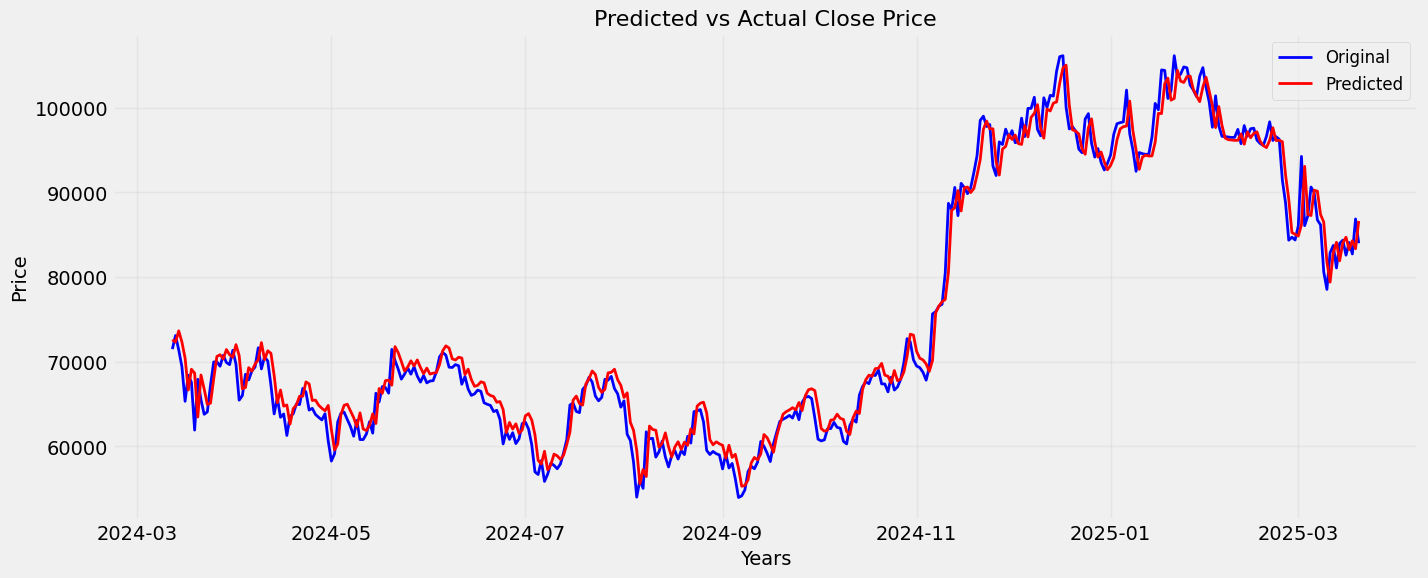

In [ ]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Predicted': inv_predictions.flatten()  # Fixed column name
    },
    index=closing_price.index[train_size + base_days:]
)

plt.figure(figsize=(15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label='Original', color="blue", linewidth=2)
plt.plot(plotting_data.index, plotting_data['Predicted'], label='Predicted', color="red", linewidth=2)  # Fixed column name & typo

plt.title("Predicted vs Actual Close Price", fontsize=16)
plt.xlabel("Years", fontsize=14)
plt.ylabel("Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [ ]:
# Predict future days
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_prediction = []

for _ in range(10):
    next_day = model.predict(last_100)
    future_prediction.append(scaler.inverse_transform(next_day))
    last_100 = np.append(last_100[:, 1:, :], next_day.reshape(1, 1, 1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


In [ ]:
future_prediction

[array([[84723.62]], dtype=float32),
 array([[84969.414]], dtype=float32),
 array([[85281.84]], dtype=float32),
 array([[85573.42]], dtype=float32),
 array([[85850.95]], dtype=float32),
 array([[86115.266]], dtype=float32),
 array([[86367.04]], dtype=float32),
 array([[86607.03]], dtype=float32),
 array([[86835.84]], dtype=float32),
 array([[87054.016]], dtype=float32)]

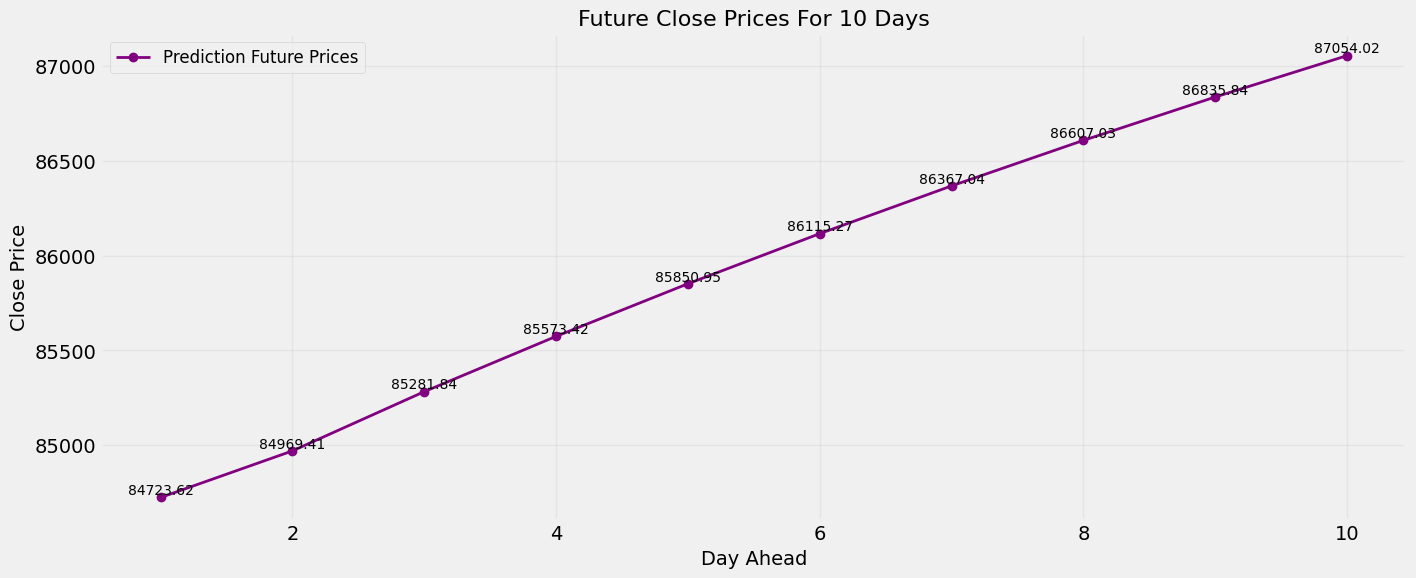

In [ ]:
future_prediction = np.array(future_prediction).flatten()

plt.figure(figsize=(15, 6))
plt.plot(range(1,11),future_prediction, marker="o", label='Prediction Future Prices', color="Purple", linewidth=2)

for i , val in enumerate(future_prediction):
  plt.text(i+1,val ,
           f'{val:.2f}', fontsize =10 , ha ="center" , va = "bottom" , color="black")

plt.title("Future Close Prices For 10 Days", fontsize=16)
plt.xlabel("Day Ahead", fontsize=14)
plt.ylabel("Close Price", fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [ ]:
model.save("model.keras")